In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#%%
########################################################
######## X-MAC: Trade_off Energy with Delay using GT
########################################################
# Radio subsystem varaible definition

P     = 32.            # Payload [byte]
R     = 31.25          # CC2420 Radio Rate [kbyte/s = Byte/ms]
D     = 8              # number of levels
C     = 5              # neighbors size (connectivity)
N     = C*D**2         # number of nodes
#### BE CAREFUL:  Times are in milliseconds (ms)
Lmax  = 5000.          # Maximal allowed Delay (ms)
Emax  = 1.             # MAximal Energy Budjet (J)

L_pbl = 4.             # preamble length [byte]
L_hdr = 9. + L_pbl     # header length [byte]
L_ack = 9. + L_pbl     # ACK length [byte]
L_ps  = 5. + L_pbl     # preamble strobe length [byte]

Tal  = 0.95            # ack listen period [ms]
Thdr = L_hdr/R         # header transmission duration [ms]
Tack = L_ack/R         # ACK transmission duration [ms]
Tps  = L_ps/R          # preamble strobe transmission duration [ms]
Tcw  = 15*0.62         # Contention window size [ms]
Tcs  = 2.60            # Time [ms] to turn the radio into TX and probe the channel (carrier sense)
Tdata = Thdr + P/R + Tack # data packet transmission duration [ms]

### Sampling frequency
Fs   = 1.0/(60*30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms

# Sleep period: Parameter Bounds
Tw_max  = 500.       # Maximum Duration of Tw in ms
Tw_min  = 100.       # Minimum Duration of Tw in ms

## Part 1

1.6666666666666667e-05
3.5526643455999998 0.0005333333333333334 0.010170400000000003 4.0 52.048
3.3333333333333333e-06
3.55053286912 0.00010666666666666667 0.00203408 4.0 52.048
1.6666666666666667e-06
3.5502664345599997 5.333333333333333e-05 0.00101704 4.0 52.048
1.111111111111111e-06
3.5501776230399997 3.555555555555555e-05 0.0006780266666666667 4.0 52.048
8.333333333333333e-07
3.55013321728 2.6666666666666667e-05 0.00050852 4.0 52.048
6.666666666666667e-07
3.550106573824 2.1333333333333335e-05 0.00040681600000000006 4.0 52.048
5.555555555555555e-07
3.5500888115199998 1.7777777777777777e-05 0.00033901333333333336 4.0 52.048


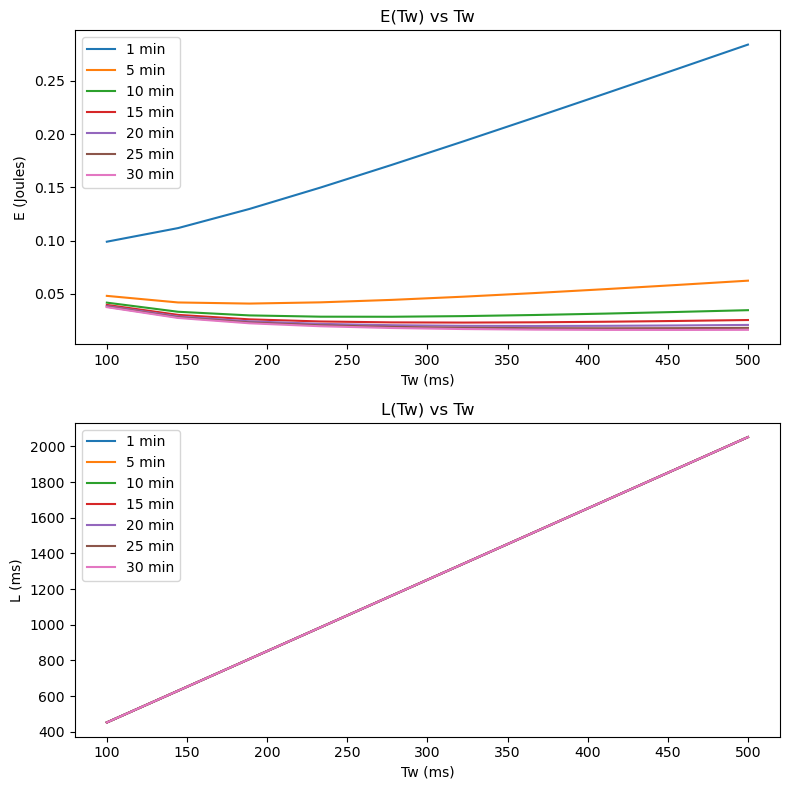

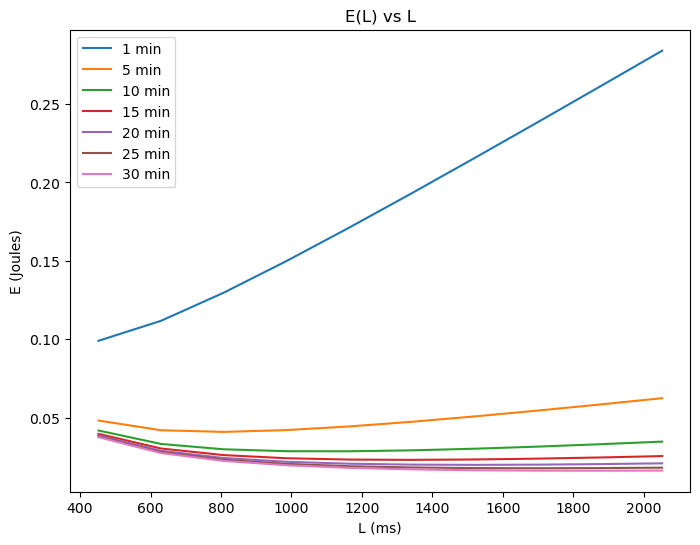

In [103]:
intervals= [1,5,10,15,20,25,30] #in minutes
data={}

for i in intervals:
    
    Fs = 1.0/(60*i*1000) #e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
    print(Fs)
    F_I_worst = Fs * ((D**2)-1)
    F_out_worst = Fs * (D**2)
    F_B_worst = (C-3) * F_out_worst

    alpha1 = Tcs + Tal + (3/2)*Tps * (((Tps+Tal)/2)+Tack+Tdata) * F_B_worst
    alpha2 = F_out_worst/2
    alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

    beta1 = D/2
    beta2 = D * ((Tcw/2) + Tdata)

    E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
    L = lambda T_w : beta1 * T_w + beta2

    print(alpha1, alpha2, alpha3, beta1, beta2)
    Es = []
    Ls = []
    Tws = []
    for Tw in np.linspace(Tw_min, Tw_max, 10):
        Tws.append(Tw)
        Es.append(E(Tw))
        Ls.append(L(Tw))
    data[i]= {'Tws':Tws, 'Es':Es, 'Ls':Ls}
    
# Plot E(Tw) and L(Tw) as a function of Tw
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
for i in intervals:
    ax[0].plot(data[i]['Tws'], data[i]['Es'], label=f"{i} min")
    ax[1].plot(data[i]['Tws'], data[i]['Ls'], label=f"{i} min")
ax[0].set_xlabel("Tw (ms)")
ax[0].set_ylabel("E (Joules)")
ax[0].set_title("E(Tw) vs Tw")
ax[0].legend()
ax[1].set_xlabel("Tw (ms)")
ax[1].set_ylabel("L (ms)")
ax[1].set_title("L(Tw) vs Tw")
ax[1].legend()
plt.tight_layout()
plt.show()

# Plot E(L) as a function of L
fig, ax = plt.subplots(figsize=(8, 6))
for i in intervals:
    L_vals = np.array(data[i]['Ls'])
    E_vals = np.array(data[i]['Es'])
    ax.plot(L_vals, E_vals, label=f"{i} min")
ax.set_xlabel("L (ms)")
ax.set_ylabel("E (Joules)")
ax.set_title("E(L) vs L")
ax.legend()
plt.show()

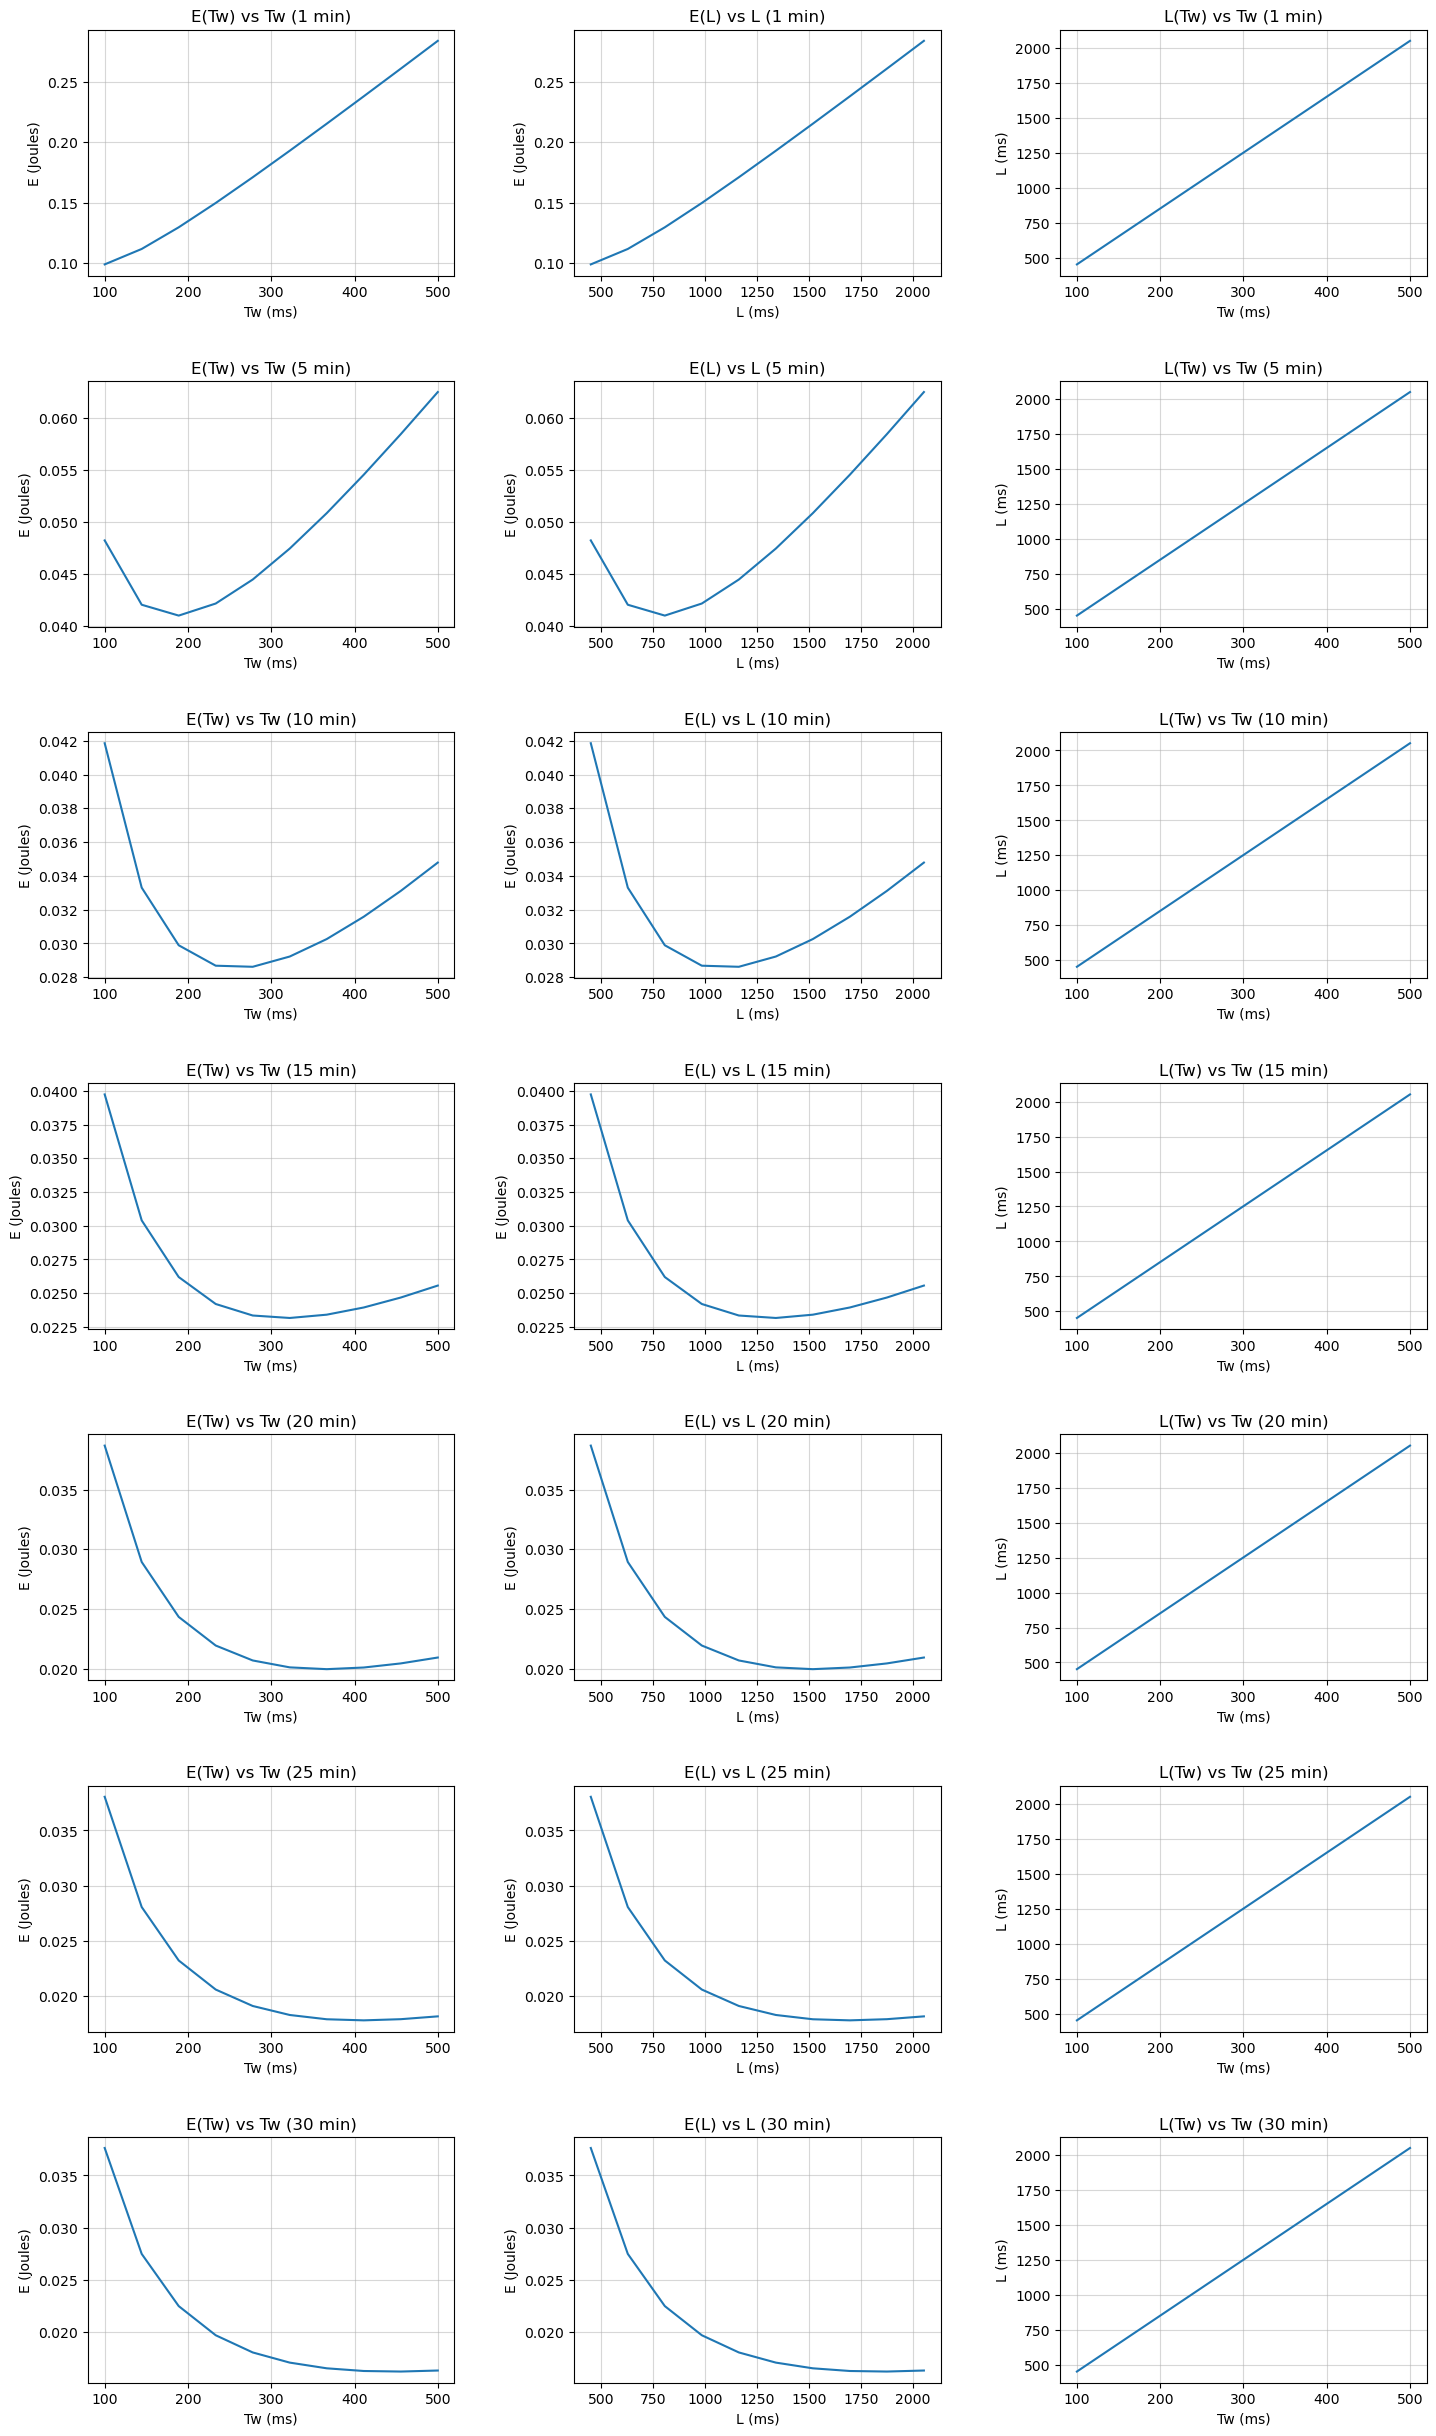

In [104]:
# Create a 7x3 grid of subplots
fig, axs = plt.subplots(7, 3, figsize=(15, 25))

# Plot E(Tw) as a function of Tw in the first column
for i, interval in enumerate(intervals):
    axs[i, 0].plot(data[interval]['Tws'], data[interval]['Es'])
    axs[i, 0].set_xlabel("Tw (ms)")
    axs[i, 0].set_ylabel("E (Joules)")
    axs[i, 0].set_title(f"E(Tw) vs Tw ({interval} min)")
    axs[i, 0].grid(which='both', alpha=0.5)

# Plot E(L) as a function of L in the second column
for i, interval in enumerate(intervals):
    L_vals = np.array(data[interval]['Ls'])
    E_vals = np.array(data[interval]['Es'])
    axs[i, 1].plot(L_vals, E_vals)
    axs[i, 1].set_xlabel("L (ms)")
    axs[i, 1].set_ylabel("E (Joules)")
    axs[i, 1].set_title(f"E(L) vs L ({interval} min)")
    axs[i, 1].grid(which='both', alpha=0.5)
    
# Plot L(Tw) as a function of Tw in the third column
for i, interval in enumerate(intervals):
    axs[i, 2].plot(data[interval]['Tws'], data[interval]['Ls'])
    axs[i, 2].set_xlabel("Tw (ms)")
    axs[i, 2].set_ylabel("L (ms)")
    axs[i, 2].set_title(f"L(Tw) vs Tw ({interval} min)")
    axs[i, 2].grid(which='both', alpha=0.5)


# Adjust subplots spacing and layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

# Part 2

In [105]:
Fs   = 1.0/(60*30*1000)    # every 30 minutes
Fs

5.555555555555555e-07

In [106]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

(3.5500888115199998,
 1.7777777777777777e-05,
 0.00033901333333333336,
 4.0,
 52.048)

In [107]:
from gpkit import Variable, Model
import numpy as np

In [108]:
Tw = Variable('Tw')

## Problem 1

We can use, as suggested, 30 minutes
Calulate the alphas for d=1 and d=D

In [109]:
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
obj = E_xmac

In [110]:
l_xmac = beta1 * Tw + beta2

In [111]:
# [100, 5000]
l_max = 5000

In [112]:
Ttx = Tw /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata

In [113]:
I_0 = C
Etx_1 = (Tcs + Tal + Ttx) * F_out_worst

In [114]:
constraints = [
    l_xmac <= l_max,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]

In [115]:
prob = Model(obj, constraints)

In [116]:
result=prob.solve()
result

Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.00419 seconds.


{'cost': 0.016227710644711024,
 'cost function': gpkit.Posynomial(3.55/Tw + 1.78e-05·Tw + 0.000339),
 'freevariables': {Tw: 446.8696821324071},
 'constants': {},
 'variables': {Tw: 446.8696821324071},
 'soltime': 0.004185199737548828,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(4·Tw + 52 ≤ 5e+03): 1.463856617265715e-11,
   gpkit.PosynomialInequality(Tw ≥ 100): 3.2943278140287787e-09,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 2.7990178545048316e-11},
  'models': {'': 3.3369565587464843e-09},
  'cost': {Tw: 4.207119697063888e-08},
  'variables': {Tw: 3.8819497901327813e-08},
  'variablerisk': {Tw: 4.5408153529385366e-08},
  'constants': {Tw: 3.8819497901327813e-08}},
 'warnings': {'Solution Inconsistency': []}}

In [117]:
E_best = result['cost']

In [118]:
L_worst = beta1 * result["variables"]["Tw"] + beta2
L_worst

1839.5267285296284

## Problem 2

In [119]:
l_xmac = beta1 * Tw + beta2
obj = l_xmac

In [120]:
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3

In [121]:
# [0.05, 0.5]
E_budget = 0.1

In [122]:
constraints = [
    E_xmac <= E_budget,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]

In [123]:
prob = Model(obj, constraints)
result=prob.solve()
result


Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.00599 seconds.


{'cost': 452.04799771602893,
 'cost function': gpkit.Posynomial(4·Tw + 52),
 'freevariables': {Tw: 99.99999980592568},
 'constants': {},
 'variables': {Tw: 99.99999980592568},
 'soltime': 0.00599217414855957,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(3.55/Tw + 1.78e-05·Tw + 0.000339 ≤ 0.1): 1.5987181378041629e-10,
   gpkit.PosynomialInequality(Tw ≥ 100): 0.8848617855233663,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 1.921221906802143e-11},
  'models': {'': 0.8848617857024502},
  'cost': {Tw: 0.8848617843915215},
  'variables': {Tw: -1.2572561563760185e-09},
  'variablerisk': {Tw: 1.7697235700787237},
  'constants': {Tw: -1.2572561563760185e-09}},
 'warnings': {'Solution Inconsistency': []}}

In [124]:
L_best = result['cost']

In [125]:
E_worst = alpha1 / result["variables"]["Tw"] + alpha2 * result["variables"]["Tw"] + alpha3
E_worst

0.03761767929175901

## Problem 3

Nash Barganians solution


In [126]:
from scipy.optimize import minimize

#380 

In [127]:
E_worst, L_worst

(0.03761767929175901, 1839.5267285296284)

In [128]:
# variables E_1, L_1, T_w
# maximize f -> minimize -f
fun = lambda x: - np.log(E_worst - x[0]) - np.log(L_worst - x[1]) 

In [129]:
def cond(x):
    E_1, L_1, T_w = x
    Ttx = T_w /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata
    Etx_1 = (Tcs + Tal + Ttx) * F_out_worst
    return -(I_0 * Etx_1 - 1/4)

In [130]:
cons = (
    # E_1, L_1, T_w
        {'type': 'ineq', 'fun': lambda x: -(alpha1 / x[2] + alpha2 * x[2] + alpha3 - E_worst)},
        {'type': 'ineq', 'fun': lambda x: -(alpha1 / x[2] + alpha2 * x[2] + alpha3 - x[0])},

        {'type': 'ineq', 'fun': lambda x: -(beta1 * x[2] + beta2 - L_worst)},
        {'type': 'ineq', 'fun': lambda x: -(beta1 * x[2] + beta2 - x[1])},

        {'type': 'ineq', 'fun': lambda x: -(Tw_min - x[2])},
        
        {'type': 'ineq', 'fun': cond},
)

In [131]:
x0 = [E_best,L_best,250]
print(minimize(fun, x0, method='SLSQP', constraints=cons, bounds=((0, Emax), (0, Lmax), (Tw_min, Tw_max))))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.759141135453512
       x: [ 2.134e-02  8.698e+02  2.044e+02]
     nit: 23
     jac: [ 6.143e+01  1.031e-03  0.000e+00]
    nfev: 100
    njev: 23
